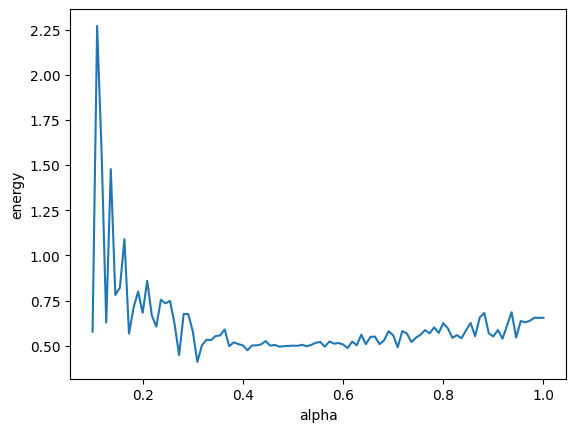

0.4098896140985047
0.3090909090909091


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

def psi(x, alpha):
    return np.exp(-alpha*x**2)

def H_psi(x, alpha):
    return (alpha*np.exp(-alpha*x**2))*(1 - (2*alpha*(x**2))) + 0.5*(x**2)




def epsilon(x,alpha):
    return alpha + (x**2)*(0.5 - 2*alpha**2)



def metropolis(x, alpha, delta):
    x_new = x + delta*np.random.uniform(-1, 1)
    if np.random.uniform(0, 1) < (psi(x_new, alpha)**2)/(psi(x, alpha)**2):
        return x_new
    elif (psi(x_new, alpha)**2)/(psi(x, alpha)**2)  > 1:
        return x_new
    else:
        return x




def energy(alpha, delta, N):
    x = 0
    E = 0
    for i in range(N):
        x =   metropolis(x, alpha, delta)
        # E += (1/psi(x,alpha))*H_psi(x, alpha)
        E+=epsilon(x,alpha)
    return E/N

alpha = np.linspace(0.1, 1, 100)
E = np.zeros(len(alpha))
delta = 0.1
N = 10000
for i in range(len(alpha)):
    E[i] = energy(alpha[i], delta, N)
    
plt.plot(alpha, E)
plt.xlabel('alpha')
plt.ylabel('energy')
plt.show()

# to find the minimum energy,from the array E
print(min(E))
print(alpha[np.argmin(E)])

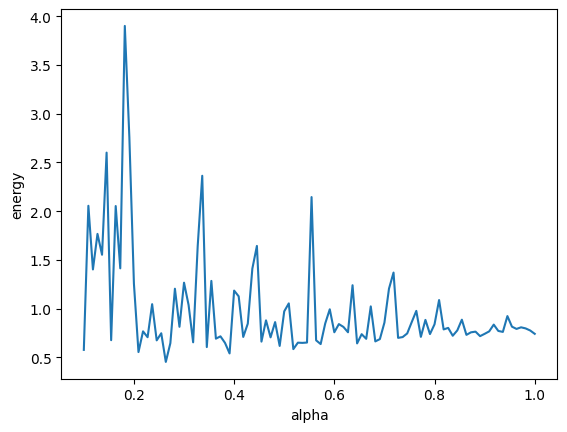

In [21]:
import numpy as np


def psi_t(x,alpha):
    return np.exp(-alpha*x**2)


def epsilon(x,alpha):
    return alpha + (x**2)*(0.5 - 2*alpha**2)


def H_psi(x, alpha):
    return (alpha*np.exp(-alpha*x**2))*(1 - (2*alpha*(x**2))) + 0.5*(x**2)





def metropolis_check(x,alpha,delta):
    x_new = x + delta*np.random.uniform(-1,1)
    if np.random.uniform(0,1) < (psi_t(x_new,alpha)**2)/(psi_t(x,alpha)**2):
        return x_new
    elif (psi_t(x_new,alpha)**2)/(psi_t(x,alpha)**2) > 1:
        return x_new
    else:
        return x



def get_energy(alpha,delta,N):
    x = 0
    E = 0
    for i in range(N):
        x  = metropolis_check(x,alpha,delta)
        E += H_psi(x,alpha)/psi_t(x,alpha)
    return E/N



alpha = np.linspace(0.1,1,100)
E = np.zeros(len(alpha))
delta = 0.1
N = 10000
for i in range(len(alpha)):
    E[i] = get_energy(alpha[i],delta,N)

plt.plot(alpha,E)
plt.xlabel('alpha')
plt.ylabel('energy')
plt.show()

    


